In [197]:
import pandas as pd
import json
import requests
import seaborn as sns
import matplotlib.pyplot as plt



# Specify the data types for the columns
dtypes = {
    'INC NUMBER': 'str',
    'OCCURRED ON': 'str',
    'OCCURRED TO': 'str',
    'UCR CRIME CATEGORY': 'str',
    '100 BLOCK ADDR': 'str',
    'ZIP': 'float',
    'PREMISE TYPE': 'str',
    'GRID': 'str'
}

# Read the CSV file with specified data types
crime_data = pd.read_csv('Resources\Crime-data.csv', dtype=dtypes)

# Drop rows with missing 'ZIP' values
crime_data = crime_data.dropna(subset=['ZIP'])

# Remove decimal points from the 'ZIP' column
crime_data['ZIP'] = crime_data['ZIP'].astype(int)

# Display the dataframe
crime_data.head(10)




,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE,GRID
0,201700001603695,11/01/2015 00:00,03/31/2016 00:00,RAPE,38XX W CAMELBACK RD,85019,HOSPITAL,BI20
1,201700001722914,11/01/2015 00:00,NaN,LARCENY-THEFT,279XX N 23RD LN,85085,SINGLE FAMILY HOUSE,FA23
2,201500002168686,11/01/2015 00:00,11/11/2015 09:30,LARCENY-THEFT,14XX E HIGHLAND AVE,85014,PARKING LOT,BI30
3,201600000527709,11/01/2015 00:00,03/22/2016 00:36,LARCENY-THEFT,33XX W CAMELBACK RD,85017,PARKING LOT,BJ21
4,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029,SINGLE FAMILY HOUSE,DA19
5,201500002103724,11/01/2015 00:00,11/01/2015 15:21,DRUG OFFENSE,54XX W INDIAN SCHOOL RD,85031,APARTMENT,BH16
6,201500002102668,11/01/2015 00:00,11/01/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043,SINGLE FAMILY HOUSE,AF12
7,201500002101405,11/01/2015 00:00,11/01/2015 05:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307,SINGLE FAMILY HOUSE,BJ04
8,201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014,APARTMENT,BJ30
9,201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006,SINGLE FAMILY HOUSE,BD30


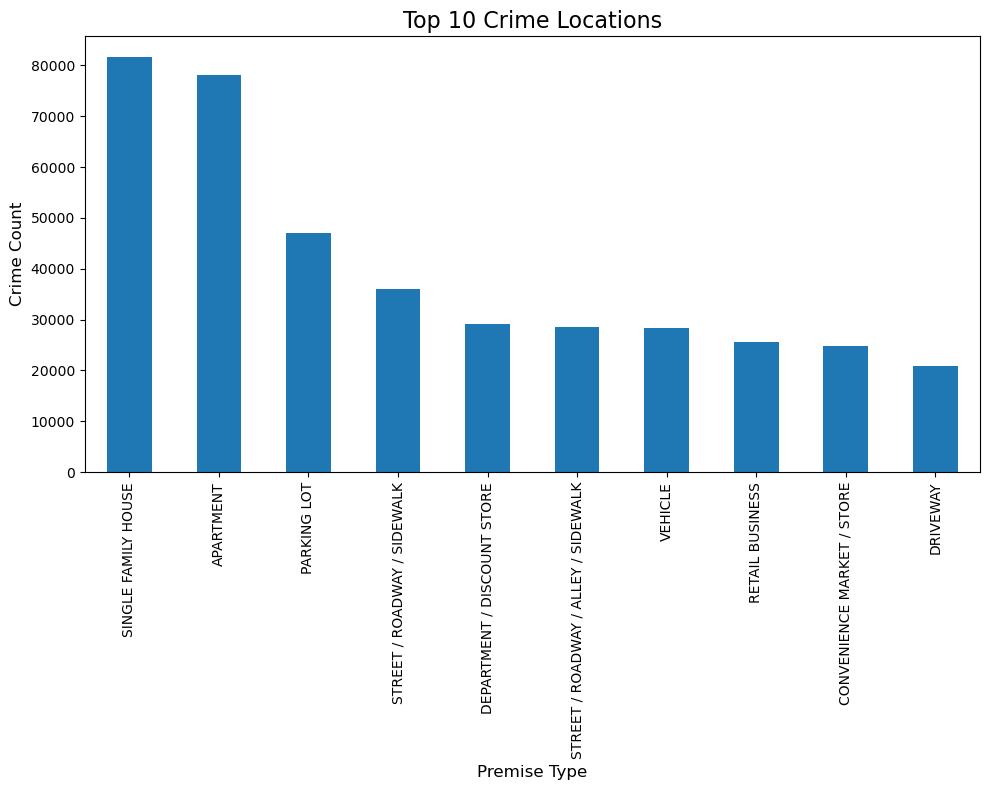

In [198]:
top_locations = crime_data['PREMISE TYPE'].value_counts().head(10)
top_locations.plot(kind='bar', figsize=(10, 8))

plt.title('Top 10 Crime Locations', fontsize=16)
plt.xlabel('Premise Type', fontsize=12)
plt.ylabel('Crime Count', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Resources/image-output/Top_10_location.png')
plt.show()


The majority of crimes are taking place in single family homes. Followed closely by apartments. This suggests that residential crimes are a major concern in the Phoenix area. Public and Commercial areas also shoe a significant amount of crimes. Public safety effors should focus on street and sidewalks to help prevent more of these crimes taking place in the future. 

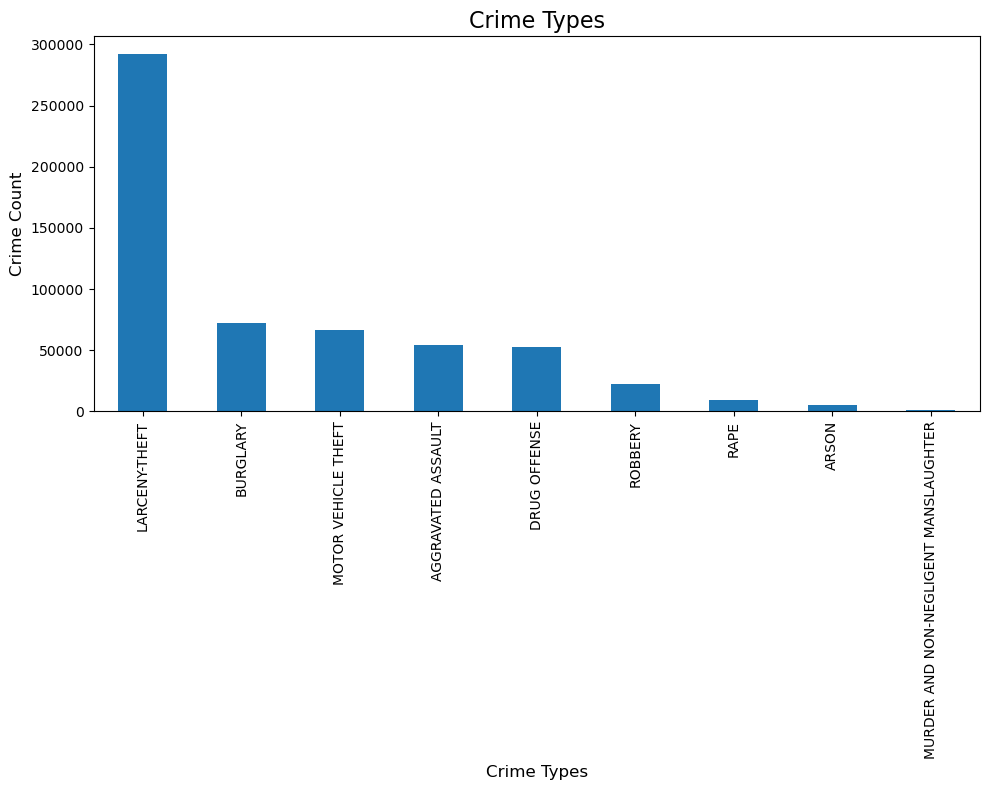

In [199]:
top_crimes = crime_data['UCR CRIME CATEGORY'].value_counts().head(10)
top_crimes.plot(kind='bar', figsize=(10, 8))

plt.title('Crime Types', fontsize=16)
plt.xlabel('Crime Types', fontsize=12)
plt.ylabel('Crime Count', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Resources\image-output\crime_types.png')
plt.show()



In [200]:
top_locations = crime_data['PREMISE TYPE']
top_crimes = crime_data['UCR CRIME CATEGORY']

combined_df = pd.DataFrame({'Top Locations': (top_locations), 'Top Crimes': (top_crimes)})

combined_df

,Top Locations,Top Crimes
0,HOSPITAL,RAPE
1,SINGLE FAMILY HOUSE,LARCENY-THEFT
2,PARKING LOT,LARCENY-THEFT
3,PARKING LOT,LARCENY-THEFT
4,SINGLE FAMILY HOUSE,MOTOR VEHICLE THEFT
...,...,...
575762,FAST FOOD STORE,BURGLARY
575763,STREET / ROADWAY / SIDEWALK,MOTOR VEHICLE THEFT
575764,CONVENIENCE MARKET / STORE,LARCENY-THEFT
575765,SINGLE FAMILY HOUSE,LARCENY-THEFT


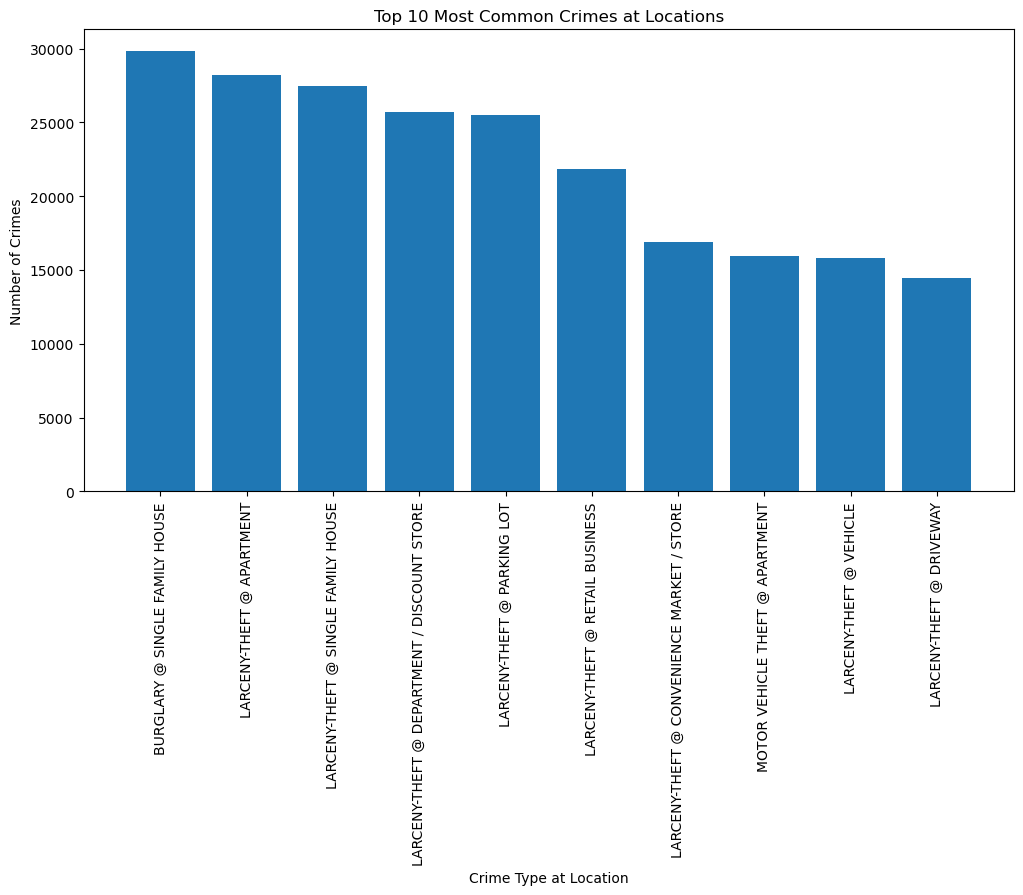

In [201]:
grouped_crime=combined_df.groupby(['Top Locations', 'Top Crimes']).size().reset_index(name='Count')
top_10_crime_location_pairs= grouped_crime.sort_values(by='Count', ascending=False).head(10)
labels = []
for index, row in top_10_crime_location_pairs.iterrows():
    labels.append(f"{row['Top Crimes']} @ {row['Top Locations']}")

plt.figure(figsize=(12, 6))
plt.bar(labels, top_10_crime_location_pairs['Count'])
plt.xlabel("Crime Type at Location")
plt.ylabel("Number of Crimes")
plt.title("Top 10 Most Common Crimes at Locations")
plt.xticks(rotation=90)  
plt.savefig('Resources\image-output\common_location_and_crimes.png')
plt.show()

Residential areas are a crime hotspot for both burglary and larceny. Suggesting that home invasions are a significant concern for single family homeowners. Renters should also be concerned with the high level of larceny and should take proper precautions.
Overall Home Security should be a high priority for those in the Pheonix area epaxially if you for single-family homes and renters


In [202]:
crime_data['OCCURRED TO']=pd.to_datetime(crime_data['OCCURRED TO'])
crime_data['OCCURRED TO']=crime_data['OCCURRED TO'].dt.strftime('%H:%m')
crime_data = crime_data.dropna(subset=['OCCURRED TO'])
crime_data

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE,GRID
0,201700001603695,11/01/2015 00:00,00:03,RAPE,38XX W CAMELBACK RD,85019,HOSPITAL,BI20
2,201500002168686,11/01/2015 00:00,09:11,LARCENY-THEFT,14XX E HIGHLAND AVE,85014,PARKING LOT,BI30
3,201600000527709,11/01/2015 00:00,00:03,LARCENY-THEFT,33XX W CAMELBACK RD,85017,PARKING LOT,BJ21
4,201600000052855,11/01/2015 00:00,00:01,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029,SINGLE FAMILY HOUSE,DA19
5,201500002103724,11/01/2015 00:00,15:11,DRUG OFFENSE,54XX W INDIAN SCHOOL RD,85031,APARTMENT,BH16
...,...,...,...,...,...,...,...,...
575760,202500000080607,01/16/2025 22:30,22:01,MOTOR VEHICLE THEFT,N 40TH AVE & W HACKAMORE DR,85083,SINGLE FAMILY HOUSE,EH19
575762,202500000082103,01/16/2025 23:00,09:01,BURGLARY,66XX W INDIAN SCHOOL RD,85033,FAST FOOD STORE,BG13
575763,202500000081831,01/16/2025 23:00,06:01,MOTOR VEHICLE THEFT,21XX E GRENADINE RD,85040,STREET / ROADWAY / SIDEWALK,AD32
575764,202500000080716,01/16/2025 23:01,23:01,LARCENY-THEFT,120XX N 32ND ST,85028,CONVENIENCE MARKET / STORE,DA34


In [203]:
crime_time=crime_data.groupby(['UCR CRIME CATEGORY','OCCURRED TO']).size().reset_index(name='Count')
#Most common time for each type of crime
most_commmon_times=crime_time.loc[crime_time.groupby('UCR CRIME CATEGORY')['Count'].idxmax()]
most_commmon_times

,UCR CRIME CATEGORY,OCCURRED TO,Count
7,AGGRAVATED ASSAULT,00:08,164
331,ARSON,03:08,18
670,BURGLARY,07:11,338
1056,DRUG OFFENSE,16:01,164
1236,LARCENY-THEFT,07:01,1215
1534,MOTOR VEHICLE THEFT,07:11,467
1739,MURDER AND NON-NEGLIGENT MANSLAUGHTER,00:12,12
2007,RAPE,00:12,144
2512,ROBBERY,19:01,76


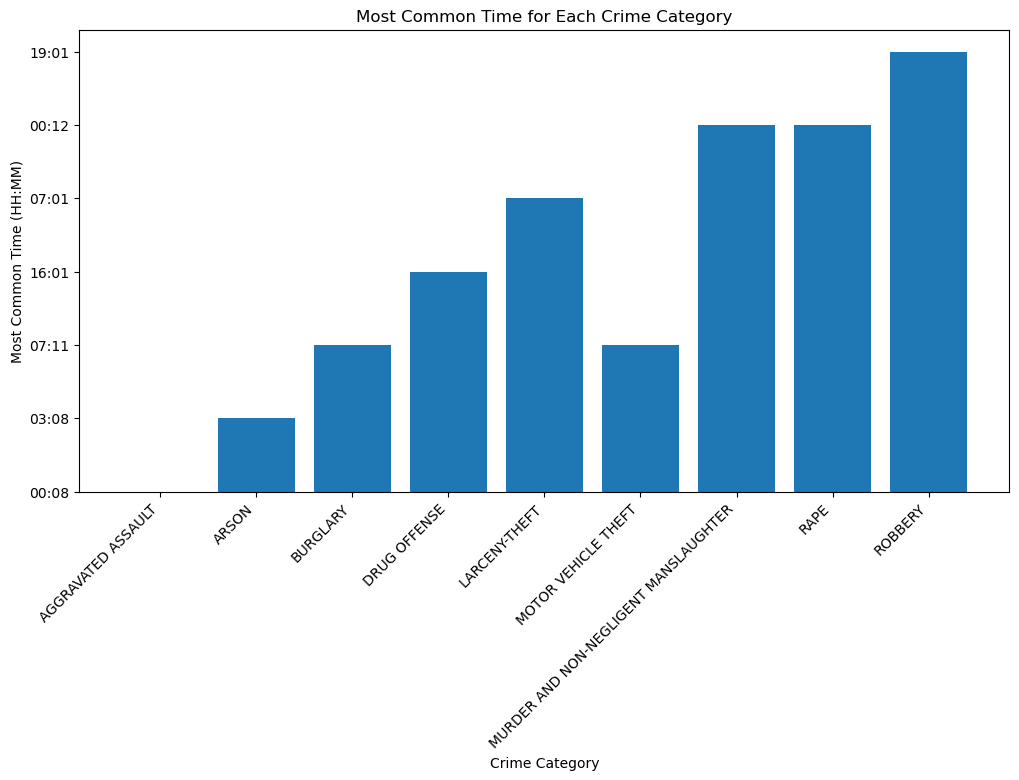

In [204]:
plt.figure(figsize=(12, 6))
bars = plt.bar(most_commmon_times['UCR CRIME CATEGORY'], most_commmon_times['OCCURRED TO'].astype(str)) 
              

# Labels & Formatting
plt.xticks(rotation=45, ha='right')
plt.xlabel('Crime Category')
plt.ylabel('Most Common Time (HH:MM)')
plt.title('Most Common Time for Each Crime Category')


plt.show()

In [205]:
time_counts=most_commmon_times.value_counts()
time_counts

UCR CRIME CATEGORY                     OCCURRED TO  Count
AGGRAVATED ASSAULT                     00:08        164      1
ARSON                                  03:08        18       1
BURGLARY                               07:11        338      1
DRUG OFFENSE                           16:01        164      1
LARCENY-THEFT                          07:01        1215     1
MOTOR VEHICLE THEFT                    07:11        467      1
MURDER AND NON-NEGLIGENT MANSLAUGHTER  00:12        12       1
RAPE                                   00:12        144      1
ROBBERY                                19:01        76       1
Name: count, dtype: int64

In [207]:
time_counts.idxmax()

'07:01'

In [206]:
most_commmon_times['OCCURRED TO'] = pd.to_datetime(most_commmon_times['OCCURRED TO'], format='%H:%M')
most_commmon_times['Time'] = most_commmon_times['OCCURRED TO'].dt.strftime('%H:%M')
time_counts = most_commmon_times.groupby('Time')['Count'].sum()

most_common_time = time_counts.idxmax()  #  time with the max
most_common_time_count = time_counts.max()  # sum of counts for that time

print(f"The most common time for crimes to occur is {most_common_time} with {most_common_time_count} total occurrences.")


The most common time for crimes to occur is: 07:01 with 1215 total occurrences.


In [210]:
crime_data['OCCURRED TO'] = pd.to_datetime(crime_data['OCCURRED TO'], errors='coerce')
crime_data['hour'] =crime_data['OCCURRED TO'].dt.hour
hourly_counts=crime_data['hour'].value_counts().sort_index()
hourly_counts

C:\Users\natal\AppData\Local\Temp\ipykernel_22372\2610977953.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_data['OCCURRED TO'] = pd.to_datetime(crime_data['OCCURRED TO'], errors='coerce')


hour
0     18538
1      7040
2      7190
3      7939
4     10085
5     14715
6     20494
7     22685
8     21317
9     18426
10    17896
11    16121
12    18358
13    16254
14    17698
15    18926
16    18411
17    17989
18    16067
19    14055
20    13190
21    11360
22     9647
23    13612
Name: count, dtype: int64

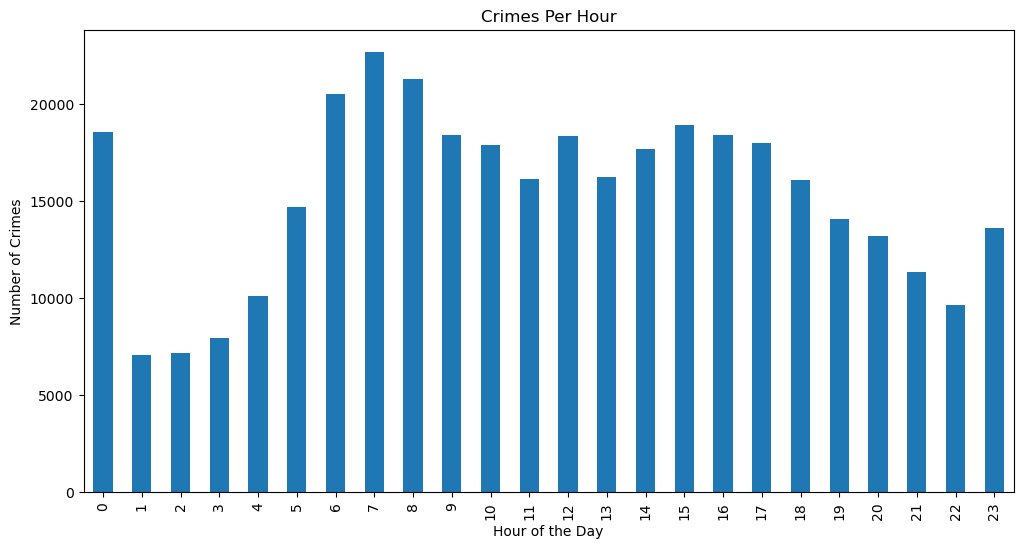

In [212]:
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind="bar")  
plt.xlabel("Hour of the Day")  
plt.ylabel("Number of Crimes")  
plt.title("Crimes Per Hour")  
plt.show()